# SVM(Support Vector Machine)

### SVM을 활용한 비만도 (BMI) 측정예측
- BMI = 몸무게 (Kg) / 키 (m) * 키 (m)
- BMI가 18.5 이상 25 미만일때가 표준몸무게입니다.

In [3]:
# 데이터를 획득하기 위해 무작위로 2만명 데이터를 생성
# 키(cm), 몸무게(kg), Label(저체중(thin), 정상체중(normal), 비만(fat))의 csv 생성

import random

# BMI를 계사내서 Label을 return하는 함수
def calc_bmi(h, w):
    # 키가 M(미터)이기에 100을 나눠줘야된다.
    bmi = w / (h/100) ** 2
    # return을 쓰면 값을 가지고 날라가기때문에 굳이 elif 등을 쓸 필요가 없다.
    if bmi < 18.5 : return "thin"
    if bmi < 25 : return "normal"
    return "fat"

# 저장 파일 준비하기
fp = open("../Data/bmi.csv",'w', encoding='utf-8')
# 헤더(header) 만들어서 저장하기
fp.write("height,weight,label\r\n")

# 무작위로 데이터 생성하기
    # 딕셔너리 생성
cnt = {"thin":0, "normal":0, "fat":0}

for i in range(20000):
    # height를 120~200cm로 랜덤으로 생성
    h = random.randint(120, 200)
    w = random.randint(35, 80)
    # label은 위에서 만들었던 함수에다가 h,w를 넣어줘야된다.
    label = calc_bmi(h, w)
    cnt[label] += 1
    fp.write("{0},{1},{2}\r\n".format(h,w,label))
# 다 되면 닫으면서 ok를 찍어주고 cnt를 찍어준다.
fp.close()
print("ok : ", cnt)

ok :  {'thin': 6336, 'normal': 5937, 'fat': 7727}


### BMI 공식을 사용하지 않고 BMI 예측


In [4]:
# 데이터 불러오기
import pandas as pd

tbl = pd.read_csv("../Data/bmi.csv")
tbl.head()

,height,weight,label
0,182,77,normal
1,125,38,normal
2,161,61,normal
3,170,67,normal
4,143,70,fat


In [6]:
# 컬럼을 분리하여 정규화하기

label = tbl['label']
w = tbl['weight'] / 80
h = tbl['height'] / 200

In [19]:
w = pd.DataFrame(w)
h = pd.DataFrame(h)
label = pd.DataFrame(label)

In [20]:
w_h = pd.concat([h,w],axis=1)
w_h.head()

,height,weight
0,0.910,0.9625
1,0.625,0.4750
2,0.805,0.7625
3,0.850,0.8375
4,0.715,0.8750


In [21]:
label.head()

,label
0,normal
1,normal
2,normal
3,normal
4,fat


In [23]:
# 학습용과 훈련용으로 나누기
from sklearn.model_selection import train_test_split

train_data, test_data, train_label, test_label = train_test_split(
    # 1열부터 마지막까지 열 -> dataTemp해당
    w_h,
    # 0열 -> datalabel해당
    label
)

In [29]:
# 데이터 학습하기
from sklearn.svm import SVC
clf = SVC()
clf.fit(train_data, train_label)

/Users/tj/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC()

In [30]:
# 정확도 구하기
clf.score(test_data, test_label)

0.9946

In [31]:
# Confusion Matrix 출력하기
# 혼동 행렬(Confusion Matrix)
from sklearn import metrics
cl_report = metrics.classification_report(test_label, clf.predict(test_data))
print(cl_report)

              precision    recall  f1-score   support

         fat       1.00      1.00      1.00      1941
      normal       0.99      0.99      0.99      1461
        thin       0.99      0.99      0.99      1598

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



In [32]:
metrics.confusion_matrix(test_label, clf.predict(test_data))

array([[1936,    5,    0],
       [   2, 1448,   11],
       [   0,    9, 1589]])

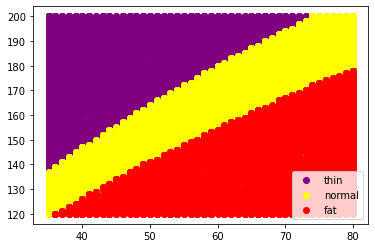

In [26]:
# 시각화 해보기
import matplotlib.pyplot as plt
# index_col=2는 인덱스
tbl = pd.read_csv('../Data/bmi.csv', index_col=2)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

def scatter(lbl, color):
    b = tbl.loc[lbl]
    ax.scatter(b['weight'], b['height'], c=color, label=lbl)

scatter('thin', 'purple')
scatter('normal', 'yellow')
scatter('fat', 'red')
ax.legend()
plt.savefig("../Data/bmi-test.png")
plt.show()


---
# SVM의 종류
- SVC(Classification)
- NuSVC : "
- LinearSVC : SVM 중에서 가장 빠름, SVC 대비 약 3배정도 빠르다

In [34]:
# 데이터 학습하기
clf = svm.LinearSVC()
clf.fit(train_data, train_label)

/Users/tj/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LinearSVC()

In [35]:
# 정확도 구하기
clf.score(test_data, test_label)

0.9326